In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
column_names = [f"Attribute_{i}" for i in range(1, 25)]
df = pd.read_csv("german.data-numeric", sep='\s+', header=None, names=column_names)
df.head()

,Attribute_1,Attribute_2,Attribute_3,Attribute_4,Attribute_5,Attribute_6,Attribute_7,Attribute_8,Attribute_9,Attribute_10,...,Attribute_15,Attribute_16,Attribute_17,Attribute_18,Attribute_19,Attribute_20,Attribute_21,Attribute_22,Attribute_23,Attribute_24
1,6,4,12,5,5,3,4,1,67,3,...,0,0,1,0,0,1,0,0,1,1
2,48,2,60,1,3,2,2,1,22,3,...,0,0,1,0,0,1,0,0,1,2
4,12,4,21,1,4,3,3,1,49,3,...,0,0,1,0,0,1,0,1,0,1
1,42,2,79,1,4,3,4,2,45,3,...,0,0,0,0,0,0,0,0,1,1
1,24,3,49,1,3,3,4,4,53,3,...,1,0,1,0,0,0,0,0,1,2


In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [8]:
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Good (1)", "Bad (2)"]))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

    Good (1)       0.77      0.92      0.84       141
     Bad (2)       0.66      0.36      0.46        59

    accuracy                           0.76       200
   macro avg       0.72      0.64      0.65       200
weighted avg       0.74      0.76      0.73       200


Confusion Matrix:
[[130  11]
 [ 38  21]]


In [9]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.755


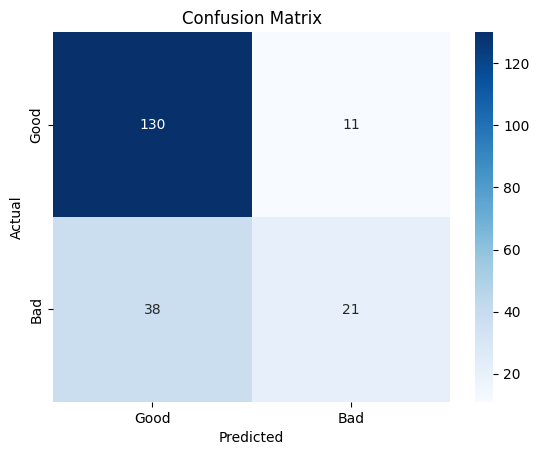

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Good", "Bad"], yticklabels=["Good", "Bad"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

Decision Tree Accuracy: 0.715


In [ ]:
import joblib
joblib.dump(model, "german_credit_model.pkl")

['german_credit_model.pkl']

### Conclusion
- Logistic Regression achieved an accuracy of around 75.5%.
- Decision Tree achieved an accuracy of around 71.5%.
- The confusion matrix shows the model performs better at predicting good credit risks.
- Future improvements could include using ensemble models (Random Forest, XGBoost), feature scaling, and hyperparameter tuning.